w0,,=  
[0.06713674]
sensitive = 
sensitive
80.95238095238095
accuracy
0.3728813559322034
w=
[-4.16348850e-04  3.12416583e-02 -1.38516853e-06  1.96522880e-02
  4.87650057e-04  1.87947883e-02  9.99258787e-08 -1.03791654e-02
  7.55879425e-04 -1.70116867e-01 -3.29459903e-02  1.53735344e-04]


Text(0.5, 1.0, 'FLD1')

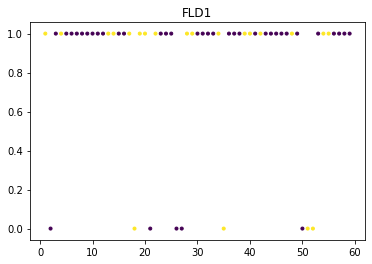

In [20]:
import matplotlib
import pandas as pd
import numpy as np
import csv
import math
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from matplotlib.pyplot import MultipleLocator
class FLD_method:
    def __init__(self,nTargets):
        self.w=np.zeros(nTargets)
        self.w0=0
        self.add=np.ones(nTargets)
    def __next__(self):
        return self
    def __iter__(self):
        return self
    def Sensitivity(self,x,y):
        count_T=0
        count_TP=0
        for i in range(len(x)):
            if y[i]==1:
                count_T=count_T+1
                if x[i]>0:
                    count_TP=count_TP+1
        sensitive=count_TP/count_T
        return sensitive
    def accuracy(self,x,y):
        count_T=0
        for i in range(len(y)):
            if ((y[i]==1)and(x[i]>0))or((y[i]==0)and(x[i]<=0)):
                count_T=count_T+1
                acc=count_T/len(y)
        return acc
    def sperate(self,x):
        for i in range(len(x)):
            if x[i]<0:
                x[i]=0
            else:
                x[i]=1
        return x
    def p(self,y):
        c=0
        for i in range(len(y)):
            if y[i]==1:
                c=c+1
        return c
    def train(self,X,y):
        #
        labels = list(set(y))  # list():将其转化为列表
        xClasses = {}  # 索引
        for label in labels:
            xClasses[label] = np.array([X[i] for i in range(len(X)) if y[i] == label])  # list解析 
        count1=0
        count2=0
        sum1=np.zeros(int(np.size(X)/len(X)))
        #print(np.size(X)/len(X))
        sum2=np.zeros(int(np.size(X)/len(X)))
        for i in range(len(y)):
            if y[i]==0:
                count1=count1+1
                sum1=sum1+X[i]
            else:
                count2=count2+1
                sum2=sum2+X[i]
        m1=sum1/count1
        m2=sum2/count2
        # 求各类均值
        length=int(np.size(X)/len(X))
        #print(m1)
        #print(m2)
    # 全局散度矩阵
        S1 = np.zeros([length,length])
        S2 = np.zeros([length,length])
        #print("x-m")
        #print(S1)
        for i in range(len(X)):
            if y[i]==0:
                S1 = S1+np.dot((X[i] - m1).reshape(len(X[i] - m1),1),(X[i] - m1).reshape(1,len(X[i] - m1)))
            else:
                S2=S2+np.dot((X[i] - m2).reshape(len(X[i] - m2),1),(X[i] - m2).reshape(1,len(X[i] - m2)))
        Sw=S1+S2
        #print("SW")
        #print(Sw)
        Sb = m1-m2
        #print("Sw=   ")
        self.w=np.dot(np.linalg.pinv(Sw), Sb)
        P0=self.p(y)
        L=math.log(P0/len(y))-math.log(1-P0/len(y))
        self.w0=np.dot((m1+m2).reshape(1,len(m1)),np.linalg.pinv(Sw))
        self.w0=np.dot(self.w0,(m1-m2))-L
        print("w0,,=  ")
        print(self.w0)
        #self.add=self.(self.add,self.w0)
        return self.w
    def test(self,x,y):
        newW = np.dot(x,self.w)+self.w0
        print("sensitive")
        print(self.Sensitivity(newW,y)*100)
        print("accuracy")
        print(self.accuracy(newW,y))
        return newW

    
#——————————————————————————开始预处理——————————————-————
with open("train_hf_data.csv","r", encoding="utf-8") as csvfile0:
    X=csv.reader(csvfile0)
    column = [row[1:] for row in X]
    X=column[1:]
    for t in range(len(X)):
        X[t]=[ float(x) for x in X[t]]
#print("X__:   ")
#print(X)    
    # 1.读取数据集并预处理
#获取excel的工作表Sheet1  
#XLABEL = pd.read_csv("D:/py/data1/train_hf_label.csv")
with open("train_hf_label.csv","r", encoding="utf-8") as csvfile:
    XLABEL=csv.reader(csvfile)
    column = [row[1] for row in XLABEL]
    XLABEL=column[1:]
    XLABEL=[ int(x) for x in XLABEL]
#print("XLABEL:   ")
#print(XLABEL)
with open("train_hf_data_sub.csv","r", encoding="utf-8") as csvfile1:
    Y=csv.reader(csvfile1)
    column = [row[1:] for row in Y]
    Y=column[1:]
    for t in range(len(Y)):
        Y[t]=[ float(x) for x in Y[t]]
#print("Y__:   ")
#print(Y)    
    # 1.读取数据集并预处理
#获取excel的工作表Sheet1  

with open("train_hf_label_sub.csv","r", encoding="utf-8") as csvfile2:
    YLABEL=csv.reader(csvfile2)
    column = [row[1] for row in YLABEL]
    YLABEL=column[1:]
    YLABEL=[ int(x) for x in YLABEL]
#print("YLABEL:   ")
#print(YLABEL)
with open("test_hf_label_add.csv","r", encoding="utf-8") as csvfile3:
    ZLABEL=csv.reader(csvfile3)
    column = [row[1] for row in ZLABEL]
    ZLABEL=column[1:]
    ZLABEL=[ int(x) for x in ZLABEL]
#print("ZLABEL:   ")
with open("test_hf_data_sub.csv","r", encoding="utf-8") as csvfile3:
    Z=csv.reader(csvfile3)
    column = [row[1:] for row in Z]
    Z=column[1:]
    for t in range(len(Z)):
        Z[t]=[ float(x) for x in Z[t]]
#print("Z__:   ")
with open("test_hf_data.csv","r", encoding="utf-8") as csvfile4:
    E=csv.reader(csvfile4)
    column = [row[1:] for row in E]
    E=column[1:]
    for t in range(len(E)):
        E[t]=[ float(x) for x in E[t]]
#print("E__:   ")
with open("test_hf_label.csv","r", encoding="utf-8") as csvfile4:
    ELABEL=csv.reader(csvfile4)
    column = [row[1] for row in ELABEL]
    ELABEL=column[1:]
    ELABEL=[ int(x) for x in ELABEL]
#print("ELABEL:   ")
#——————————————————————————预处理结束——————————————————————
# 2.LDA特征提取
W = FLD_method(len(YLABEL))  # 得到投影矩阵
t=W.train(Y,YLABEL)
#print(np.size(Y))
newY = np.dot(Y,t)  # (m*n) *(n*k)=m*k
print("sensitive = ")
#print(W.Sensitivity(newY,YLABEL))
    # 3.绘图
object0=1+len(ELABEL)
newZ = W.test(E,ELABEL)
print("w=")
print(W.w)
operateZ=W.sperate(newZ)
plt.scatter(np.arange(1,1+len(operateZ)),operateZ,c=ELABEL,marker='.')
#plt.scatter([x[8]+x[9] for x in Z],10000*operateZ,c=ZLABEL,marker='.')  # c=y,
plt.title('FLD1')
#plt.show()
 
